In [174]:
from glob import glob
import os # linux veya windows dizinleri için
import mne # Open;-source Python package for exploring, visualizing, and analyzing human neurophysiological data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [175]:
all_file_path=glob('Data/*.edf') # list şeklinde
all_file_path[0]

'Data\\Subject00_1.edf'

In [226]:
before_test=[i for i in all_file_path if '1' in i.split('_')[1]]
after_test=[i for i in all_file_path if '2' in i.split('_')[1]]
print(len(before_test),len(after_test))



36 36


###  Örnek Data


In [217]:
data2=mne.io.read_raw_edf(after_test[5],preload=True)
data1=mne.io.read_raw_edf(before_test[5],preload=True)


Extracting EDF parameters from C:\Users\Alperen Usta\Bitirme\Data\Subject05_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\Alperen Usta\Bitirme\Data\Subject05_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...


data2.plot_psd() kullanılmış bazı örneklerde. plot power spectral density

In [218]:
len(data2)

31000

In [221]:
data1

<RawEDF | Subject05_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>

In [219]:
data2.set_eeg_reference()
data2

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEDF | Subject05_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>

Opening raw-browser...


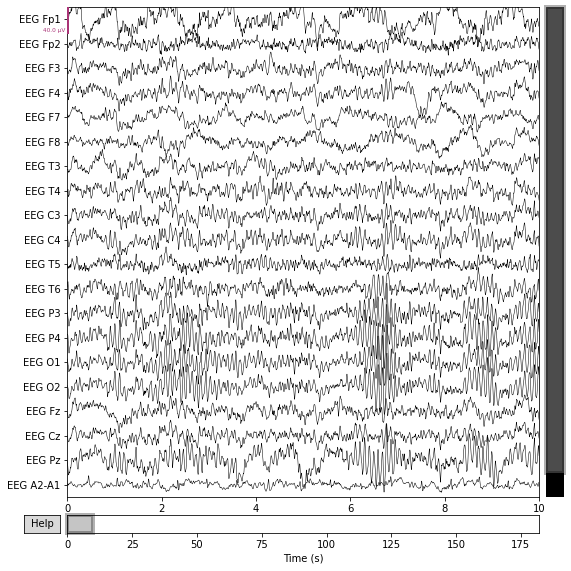

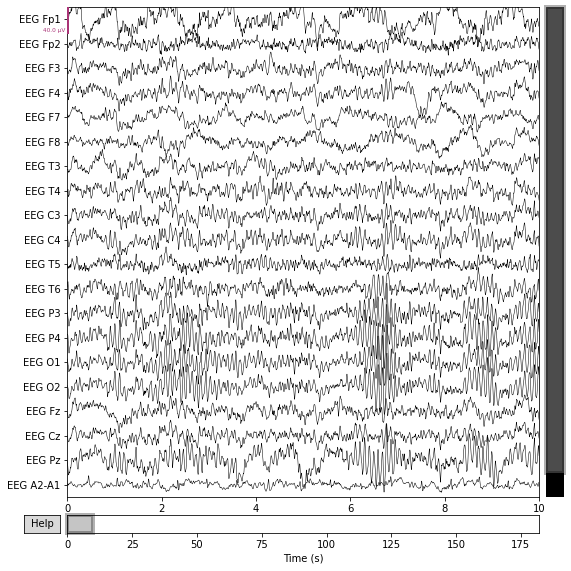

In [220]:
data1.plot()

Opening raw-browser...


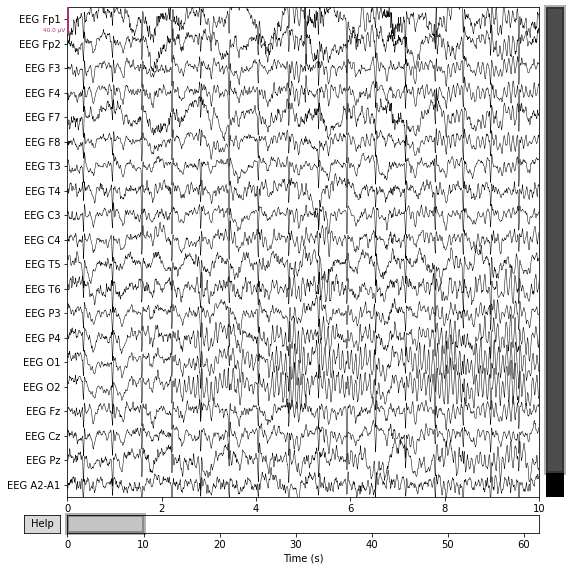

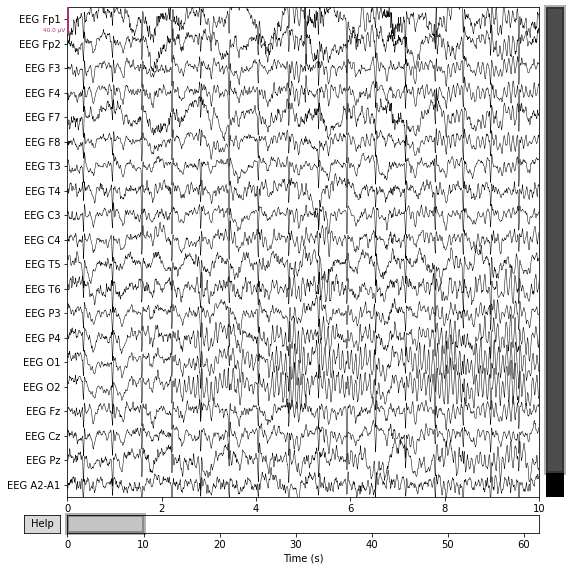

In [216]:
data2.plot()

 ### fonksiyon

In [180]:
def read_data(file_path):
    data=mne.io.read_raw_edf(file_path,preload=True)
    data.set_eeg_reference()
    data.filter(l_freq=0.5,h_freq=45)
    epochs=mne.make_fixed_length_epochs(data,duration=5,overlap=1) # Divide continuous raw data into equal-sized consecutive epochs.
    array=epochs.get_data() # to_data_frame
    return array
    
    

In [181]:
def read_data_frame(file_path):
    epochs=read_data(file_path) # Divide continuous raw data into equal-sized consecutive epochs.
    array=epochs.to_data_frame()
    return array
    

In [182]:
sample_data=read_data(after_test[0])


Extracting EDF parameters from C:\Users\Alperen Usta\Bitirme\Data\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 sec)

Not setting metadata
15 matching events found
No baseline correction applied
0 projection items act

In [183]:
sample_data.shape # no of epochs, channels, length of signal

(15, 21, 2500)

In [184]:
sample_data

array([[[ 2.54109884e-21, -3.42479364e-06, -6.63724318e-06, ...,
         -5.91471487e-06, -6.11265907e-06, -6.12045600e-06],
        [-5.29395592e-23, -1.38759057e-07, -4.88089900e-08, ...,
         -2.69057824e-06, -2.04900677e-06, -1.30152816e-06],
        [-3.17637355e-21, -1.67736426e-06, -3.11558929e-06, ...,
         -1.11922807e-05, -1.09624478e-05, -1.08408628e-05],
        ...,
        [ 2.54109884e-21,  3.24063408e-08, -2.48094929e-08, ...,
         -3.20247870e-06, -3.00675215e-06, -2.53222880e-06],
        [ 0.00000000e+00,  2.81147632e-07,  6.92415819e-07, ...,
         -1.76673102e-07,  2.29584030e-06,  4.17272127e-06],
        [ 0.00000000e+00,  1.32436820e-06,  2.04892076e-06, ...,
          8.33689657e-05,  7.08743209e-05,  5.67401882e-05]],

       [[-7.40180569e-06, -7.48319866e-06, -7.61186573e-06, ...,
         -8.42209257e-06, -7.99583226e-06, -7.32600754e-06],
        [-1.60672120e-05, -1.55644731e-05, -1.47495003e-05, ...,
         -4.16066478e-06, -5.05465214e

In [185]:
sample_data_df=read_data_frame(before_test[1])
sample_data_df


Extracting EDF parameters from C:\Users\Alperen Usta\Bitirme\Data\Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3301 samples (6.602 sec)

Not setting metadata
45 matching events found
No baseline correction applied
0 projection items act

,time,condition,epoch,EEG Fp1,EEG Fp2,EEG F3,EEG F4,EEG F7,EEG F8,EEG T3,...,EEG T6,EEG P3,EEG P4,EEG O1,EEG O2,EEG Fz,EEG Cz,EEG Pz,EEG A2-A1,ECG ECG
0,0,1,0,-1.270549e-15,-2.117582e-16,-1.164670e-15,-2.329341e-15,-2.964615e-15,-5.082198e-15,-4.235165e-16,...,4.235165e-16,3.176374e-15,3.388132e-15,2.117582e-15,1.694066e-15,3.176374e-16,-8.470329e-16,8.470329e-16,8.470329e-16,2.371692e-14
1,2,1,0,1.169987e+00,1.209100e+00,4.612563e-01,2.791345e-02,1.224498e+00,-4.979979e-01,-1.302740e-01,...,-8.667342e-01,3.297942e-02,-3.382244e-01,-4.313406e-02,5.809002e-02,2.229067e-01,-7.814444e-01,3.043371e-01,1.304778e+00,-2.094944e+00
2,4,1,0,2.247247e+00,2.313729e+00,9.121388e-01,6.577892e-02,2.376686e+00,-9.772792e-01,1.952450e-02,...,-1.529371e+00,1.926185e-01,-5.422767e-01,2.018557e-01,2.633481e-01,3.457305e-01,-1.404818e+00,7.849068e-01,2.501766e+00,-5.786548e+00
3,6,1,0,3.137264e+00,3.210967e+00,1.331027e+00,1.145831e-01,3.374524e+00,-1.421905e+00,6.356171e-01,...,-1.837773e+00,5.587218e-01,-5.162215e-01,9.378032e-01,7.153156e-01,2.819805e-01,-1.751208e+00,1.544592e+00,3.472101e+00,-1.199338e+01
4,8,1,0,3.746752e+00,3.804457e+00,1.679055e+00,1.611998e-01,4.123624e+00,-1.821459e+00,1.745994e+00,...,-1.736766e+00,1.131376e+00,-2.312468e-01,2.219648e+00,1.430515e+00,-2.885506e-02,-1.770056e+00,2.563141e+00,4.084066e+00,-2.049279e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112495,4990,1,44,-5.230430e+00,-5.128294e+00,-7.004904e+00,-5.608468e+00,-5.825947e+00,4.546983e-01,-4.013628e+00,...,-5.702777e+00,-3.437678e+00,-8.178134e+00,-5.728387e-01,-3.074741e+00,-8.101719e+00,-8.275490e+00,-1.867454e+00,-9.139460e+00,1.138243e+02
112496,4992,1,44,-5.238560e+00,-5.136716e+00,-7.016885e+00,-5.618568e+00,-5.835804e+00,4.595705e-01,-4.021684e+00,...,-5.712708e+00,-3.445532e+00,-8.193748e+00,-5.750113e-01,-3.080417e+00,-8.116149e+00,-8.291018e+00,-1.871593e+00,-9.157342e+00,1.140282e+02
112497,4994,1,44,-5.257550e+00,-5.156044e+00,-7.044017e+00,-5.641137e+00,-5.858117e+00,4.670670e-01,-4.038811e+00,...,-5.734999e+00,-3.461514e+00,-8.227544e+00,-5.787061e-01,-3.092619e+00,-8.148397e+00,-8.325003e+00,-1.879835e+00,-9.195928e+00,1.144801e+02
112498,4996,1,44,-5.282597e+00,-5.181453e+00,-7.079603e+00,-5.670660e+00,-5.887381e+00,4.760352e-01,-4.060997e+00,...,-5.764187e+00,-3.482023e+00,-8.271476e+00,-5.832263e-01,-3.108438e+00,-8.190594e+00,-8.369288e+00,-1.890345e+00,-9.246074e+00,1.150703e+02


In [186]:
sample_data_df.groupby(['epoch']).count()

,time,condition,EEG Fp1,EEG Fp2,EEG F3,EEG F4,EEG F7,EEG F8,EEG T3,EEG T4,...,EEG T6,EEG P3,EEG P4,EEG O1,EEG O2,EEG Fz,EEG Cz,EEG Pz,EEG A2-A1,ECG ECG
epoch,,,,,,,,,,,,,,,,,,,,,
0,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,...,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
1,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,...,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
2,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,...,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
3,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,...,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
4,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,...,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
5,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,...,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
6,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,...,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
7,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,...,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
8,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,...,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500


In [187]:
%%capture 
#uyarıları almasın diye
before_epochs_array=[read_data(i) for i in before_test] 
after_epochs_array=[read_data(i) for i in after_test]

In [188]:
len(before_epochs_array) # beforee'daki denek sayısı kadar (36)

36

In [189]:
type(before_epochs_array[0])

numpy.ndarray

In [190]:
before_epochs_array[0].shape, before_epochs_array[1].shape

((45, 21, 2500), (45, 21, 2500))

In [191]:
before_epochs_labels=[len(i)*[0] for i in before_epochs_array]
after_epochs_labels=[len(i)*[1] for i in after_epochs_array]
len(before_epochs_labels),len(after_epochs_labels) 

(36, 36)

In [192]:
len(before_epochs_labels[0]) ## epoch sayısına göre her bir hastanın 0 'mı 1 mi olduğunu belirliyor'

45

In [193]:
len(after_epochs_labels[0]) ## after datası daha küçük

15

In [194]:
data_list= before_epochs_array + after_epochs_array # arrayleri uç uca ekliyor 
label_list= before_epochs_labels + after_epochs_labels

In [222]:
label_list

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [195]:
len(data_list),len(label_list),data_list[0].shape,len(label_list[0])

(72, 72, (45, 21, 2500), 45)

In [196]:
len(data_list)

72

In [197]:
group_list=[[i]*len(j) for i,j in enumerate(data_list)] # her gruptaki insanın grup numarasını işaretliyoruz
len(group_list)

72

In [198]:
len(group_list[35]) # 35'e kadar 45 uzunlukta, 35'ten sonra 15 uzunlukta.

45

In [199]:
len(group_list[66])

15

In [229]:
data_array=np.vstack(data_list) # arrayleri bir araya getiriyor (vertical) (alt alta yerleştiriyor)
label_array=np.hstack(label_list) # arrayleri bir araya getiriyor (horizontal)
group_array=np.hstack(group_list)
print(data_array.shape, label_array.shape , group_array.shape)
a=np.vstack(data_array,label_array,group_array)

(2132, 21, 2500) (2132,) (2132,)


In [233]:
a=np.hstack((data_array,label_array,group_array))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 1 dimension(s)

In [201]:
data_array[1500],label_array[2000],group_array[2000]

(array([[ 5.98859347e-06,  4.96755510e-06,  4.20148984e-06, ...,
         -2.01024330e-06, -2.12658919e-06, -2.59127319e-06],
        [-1.85960826e-06, -1.59520763e-06, -1.43153633e-06, ...,
         -6.96367432e-06, -6.50936997e-06, -6.06323353e-06],
        [-2.70147060e-06, -3.11093158e-06, -3.46120357e-06, ...,
          3.73907484e-06,  3.30807044e-06,  2.69068831e-06],
        ...,
        [ 1.35779452e-06,  8.03130319e-07,  2.28279533e-07, ...,
          5.94083758e-06,  7.67884321e-06,  9.35605749e-06],
        [-4.83005800e-06, -3.20239443e-06, -1.94761822e-06, ...,
         -2.15271277e-05, -2.25864667e-05, -2.37600834e-05],
        [-3.76044883e-06, -1.68667044e-07,  2.25938236e-06, ...,
         -2.33936806e-05, -2.50648918e-05, -2.58936527e-05]]),
 1,
 63)

In [202]:
pd.DataFrame(label_array)


,0
0,0
1,0
2,0
3,0
4,0
...,...
2127,1
2128,1
2129,1
2130,1


In [203]:
label_array[1550]

0

In [204]:
mean1=np.mean(data_array,axis=-1).shape # 2500 e göre hesaplama yapacak

In [205]:
from scipy import stats
def mean(data):
    return np.mean(data,axis=-1)
    
def std(data):
    return np.std(data,axis=-1)

def ptp(data): # Range of values (maximum - minimum) along an axis.
    return np.ptp(data,axis=-1)

def var(data):
        return np.var(data,axis=-1)

def minim(data):
      return np.min(data,axis=-1)


def maxim(data):
      return np.max(data,axis=-1)

def argminim(data):
      return np.argmin(data,axis=-1)


def argmaxim(data): # max değerin indexi
      return np.argmax(data,axis=-1)

def mean_square(data):
      return np.mean(data**2,axis=-1)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=-1))  

def abs_diffs_signal(data): # elemanların kendinden sonraki ile farklarını hesaplıyor
    return np.sum(np.abs(np.diff(data,axis=-1)),axis=-1)


def skewness(data):
    return stats.skew(data,axis=-1)

def kurtosis(data):
    return stats.kurtosis(data,axis=-1)

def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),argminim(data),argmaxim(data),
                          mean_square(data),rms(data),abs_diffs_signal(data),
                          skewness(data),kurtosis(data)),axis=-1)

In [206]:
features=[]

for d in data_array:
    features.append(concatenate_features(d))
    
features=np.array(features)  
features.shape    
 

(2132, 273)

In [207]:
features

array([[ 7.80419260e-07,  7.63691893e-07,  1.02176168e-06, ...,
         1.36281170e+00,  1.20507000e+00,  6.29036022e+00],
       [ 6.21661081e-08,  2.16530106e-07,  1.48165529e-07, ...,
         4.63354499e-02,  3.79188593e-01,  6.20765700e+00],
       [ 2.04456718e-07,  3.12540964e-07,  1.39762573e-07, ...,
         2.99233962e-01,  8.35847493e-01,  6.31149189e+00],
       ...,
       [ 1.18440391e-07, -6.04775692e-07, -1.97689942e-07, ...,
        -2.39591125e-01,  3.11902344e-01, -4.14611876e-01],
       [-2.04848844e-07, -4.30098861e-07, -2.24203047e-07, ...,
         2.45249279e+00,  7.27555699e-01, -3.89434725e-02],
       [ 1.49744078e-07, -1.07276058e-07,  2.72741482e-07, ...,
         8.49297560e-01,  4.38963427e-01,  6.27660331e-01]])

In [208]:
273/21

13.0

In [209]:
from sklearn.linear_model import LogisticRegression # 
from sklearn.pipeline import Pipeline # (classification) nanladığım kadarıyla işlemleri birbirine zincirliyor. daha sonra pipeline.fit yapılıyor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold,GridSearchCV,cross_val_score,cross_validate 



GroupKFold --> her grup bir kez gözüküyor
GridSearchCV--> find best parameters (yöntemi içinde veriyorsun) linear regression'da belli sayılar vererek en düşük hata oranını veriyor(mesela)


In [210]:
clf=LogisticRegression()
gkf=GroupKFold(n_splits=5)
param_grid = {'classifier__C': [0.01,0.05,0.1,0.5, 1,2,3,4,5,8, 10,12,15]} # 1 den büyüklerin anlamı yok 
pipe=Pipeline([('scaler',StandardScaler()),('classifier',clf)]) # scaler kaldır
gscv=GridSearchCV(pipe,param_grid,cv=gkf,n_jobs=16) # sadece clas. verilebilir.
gscv.fit(data_array,label_array,groups=group_array)

GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=16,
             param_grid={'classifier__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5,
                                           8, 10, 12, 15]})

In [211]:
gscv.best_score_

0.6759633927112273